# 1. Загрузка данных

In [326]:
# Импортируем необходимые библиотеки

import numpy as np 
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
import warnings 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report, accuracy_score, f1_score, roc_curve, auc, average_precision_score
import phik
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from matplotlib.ticker import MaxNLocator
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [327]:
# Создадим функцию, для отображения нужной информации о датафрейме
def df_info(df):
    display(df.head(10))
    df.info()
    display(df.describe())

In [328]:
# Загрузим необходимые датасеты
df_train = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")

In [329]:
# Отобразим информацию о тренировочном датасете
df_info(df_train)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [330]:
# Отобразим информацию о тестовом датасете
df_info(df_test)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
5,58650,23,66000,RENT,5.0,EDUCATION,D,22000,14.09,0.33,N,2
6,58651,26,75000,OWN,10.0,PERSONAL,B,8000,10.62,0.11,N,4
7,58652,23,55000,MORTGAGE,6.0,PERSONAL,A,6250,6.76,0.12,N,2
8,58653,32,29124,RENT,0.0,PERSONAL,C,7200,13.11,0.26,Y,6
9,58654,22,90000,RENT,4.0,DEBTCONSOLIDATION,C,10000,13.49,0.11,Y,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,78193.500000,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,11286.764749,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,58645.000000,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,68419.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,78193.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,87967.750000,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,97742.000000,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


Информация о признаках:
- id — уникальный идентификатор записи.

- person_age — возраст заемщика (в годах).

- person_income — годовой доход заемщика (в долларах).

- person_home_ownership — тип владения жильём:

  RENT — арендует,

  OWN — владеет,

  MORTGAGE — ипотека,

  OTHER — другой вариант.

- person_emp_length — стаж работы заемщика (в годах).

- loan_intent — цель кредита (например, EDUCATION, MEDICAL, VENTURE, PERSONAL и т.д.).

- loan_grade — кредитный рейтинг (обычно от A до G, где A — наилучший).
  A → очень хороший рейтинг (минимальный риск, самые низкие проценты).

  B → хороший рейтинг, чуть выше риск.

  C → средний рейтинг (умеренный риск).

  D → ниже среднего (риск выше среднего).

  E → плохой рейтинг (высокий риск).

  F → очень плохой рейтинг.

  G → крайне рискованный заемщик.

- loan_amnt — сумма кредита (в долларах).

- loan_int_rate — процентная ставка по кредиту (в % годовых).

- loan_percent_income — отношение ежемесячного платежа по кредиту к ежемесячному доходу заемщика (Debt-to-Income ratio).

- cb_person_default_on_file — отметка в кредитной истории о дефолте:

  Y — есть запись о дефолте,

  N — нет.

- cb_person_cred_hist_length — длина кредитной истории заемщика (в годах).

- loan_status — статус кредита (целевая переменная):

  0 — кредит выплачен,

  1 — дефолт.

# 2. Предобработка данных

### 2.1 Удаление пропусков

#####  Определим кол-во пропусков

In [331]:
df_train.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [332]:
df_test.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Пропуски не обнаружены 

### 2.2 Выставление корректных типов данных

In [333]:
int_cols_train = df_train.select_dtypes(include='int64').columns
int_cols_test = df_test.select_dtypes(include='int64').columns
float_cols_train = df_train.select_dtypes(include='float64').columns
float_cols_test = df_test.select_dtypes(include='float64').columns

df_train[int_cols_train] = df_train[int_cols_train].astype('int32')
df_test[int_cols_test] = df_test[int_cols_test].astype('int32')
df_train[float_cols_train] = df_train[float_cols_train].astype('float32')
df_test[float_cols_test] = df_test[float_cols_test].astype('float32')

### 2.3 Обработка дубликатов

In [334]:
df_train.duplicated().sum()

0

In [335]:
df_test.duplicated().sum()

0

Явные дубликаты не найдены

# 3. Исследовательский анализ данных

### 3.1 Визуализируем непрерывные признаки

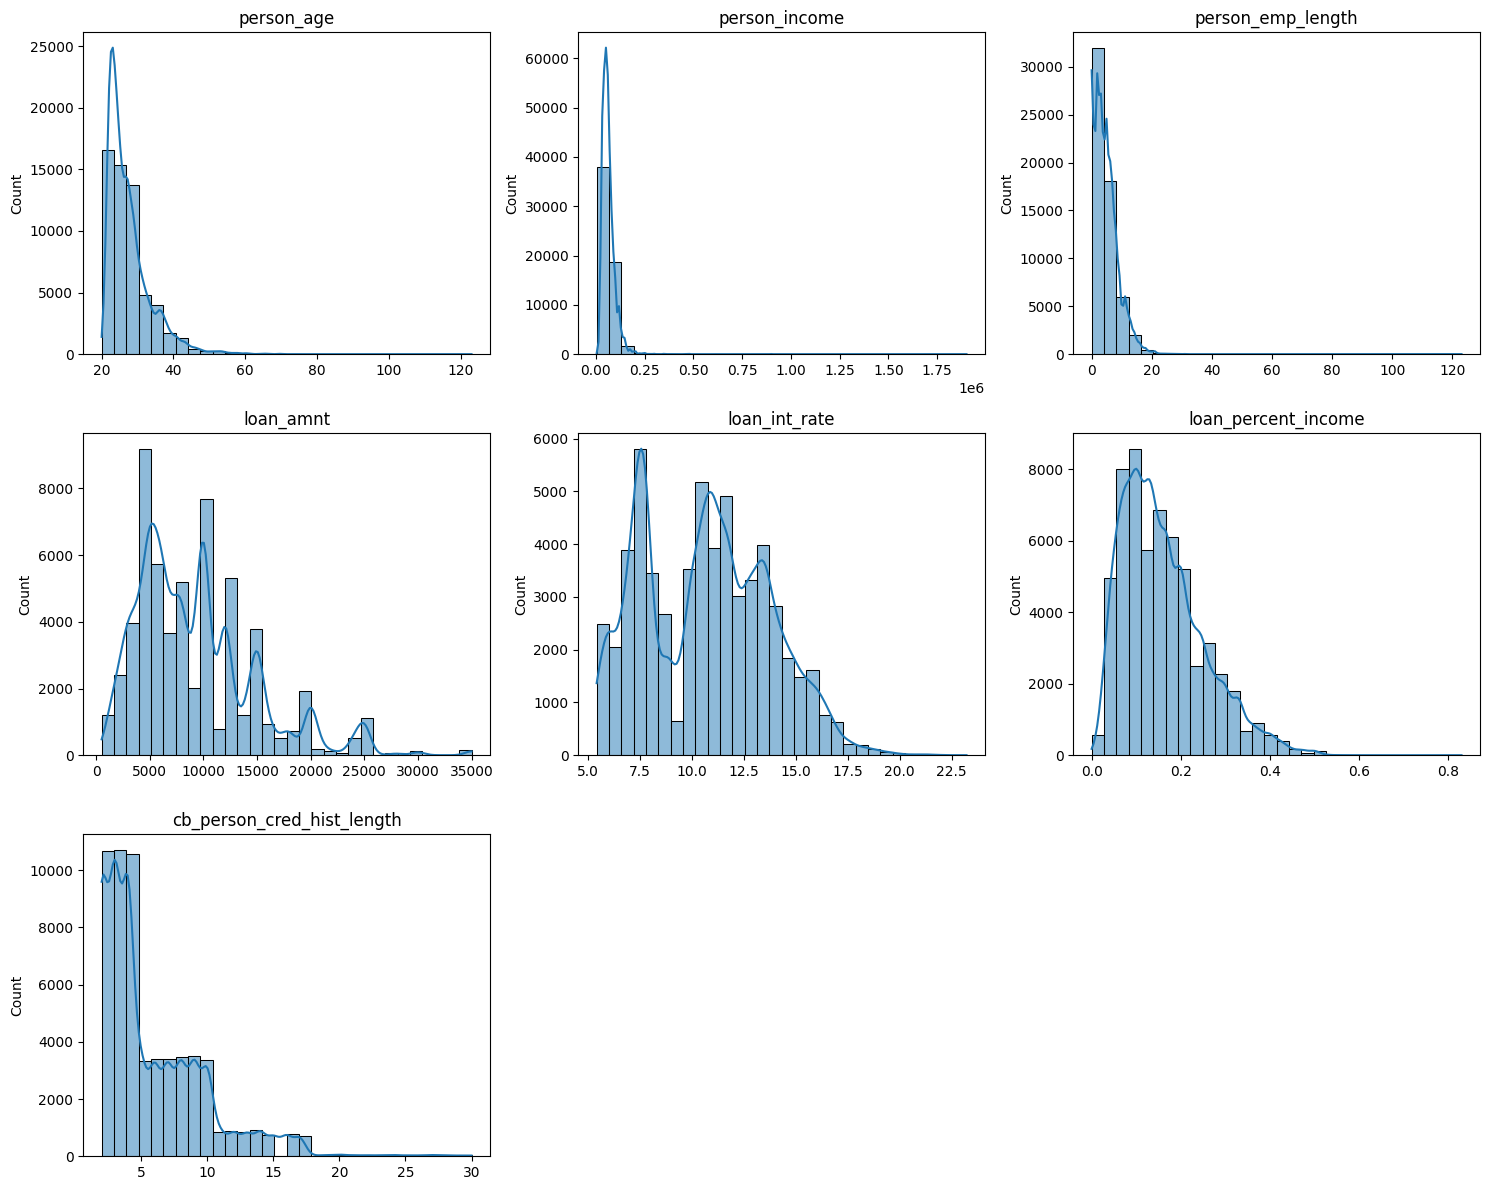

In [336]:
num_feat = [
    "person_age", "person_income", "person_emp_length", 
    "loan_amnt", "loan_int_rate", "loan_percent_income", 
    "cb_person_cred_hist_length"
]
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_feat):
    sns.histplot(df_train[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'{num_feat[i]}')
    axes[i].set_xlabel('')
    plt.xticks(rotation = 25)

# Удалим последний, ибо пустой  
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

plt.tight_layout()
plt.show()

Как видно из графиков выше:
- большинство людей берущих кредит - моложе 40 лет, особенно много в возрасте от 20 до 30 лет
- доход у большинства - меньше 250 000 долларов
- в большинстве случаев стаж работы - меньше 20 лет,особенного много людей со стажем меньше 4 лет
- сумма кредитов у большинства не прывает 35 000 долларов, наблюдается несколько максимумов
- процентная ставка по кредиту в большинстве случаев не превышает 20%
- большиство людей отдают - менее 40% от своего ежемесячного дохода, для ежемесячного платежа по кредиту
- у большинства заещиков кредитная история - меньше 15 лет, особенно много людей с кредитной историей менее 5 лет

### 3.2 Визуализируем категориальные признаки

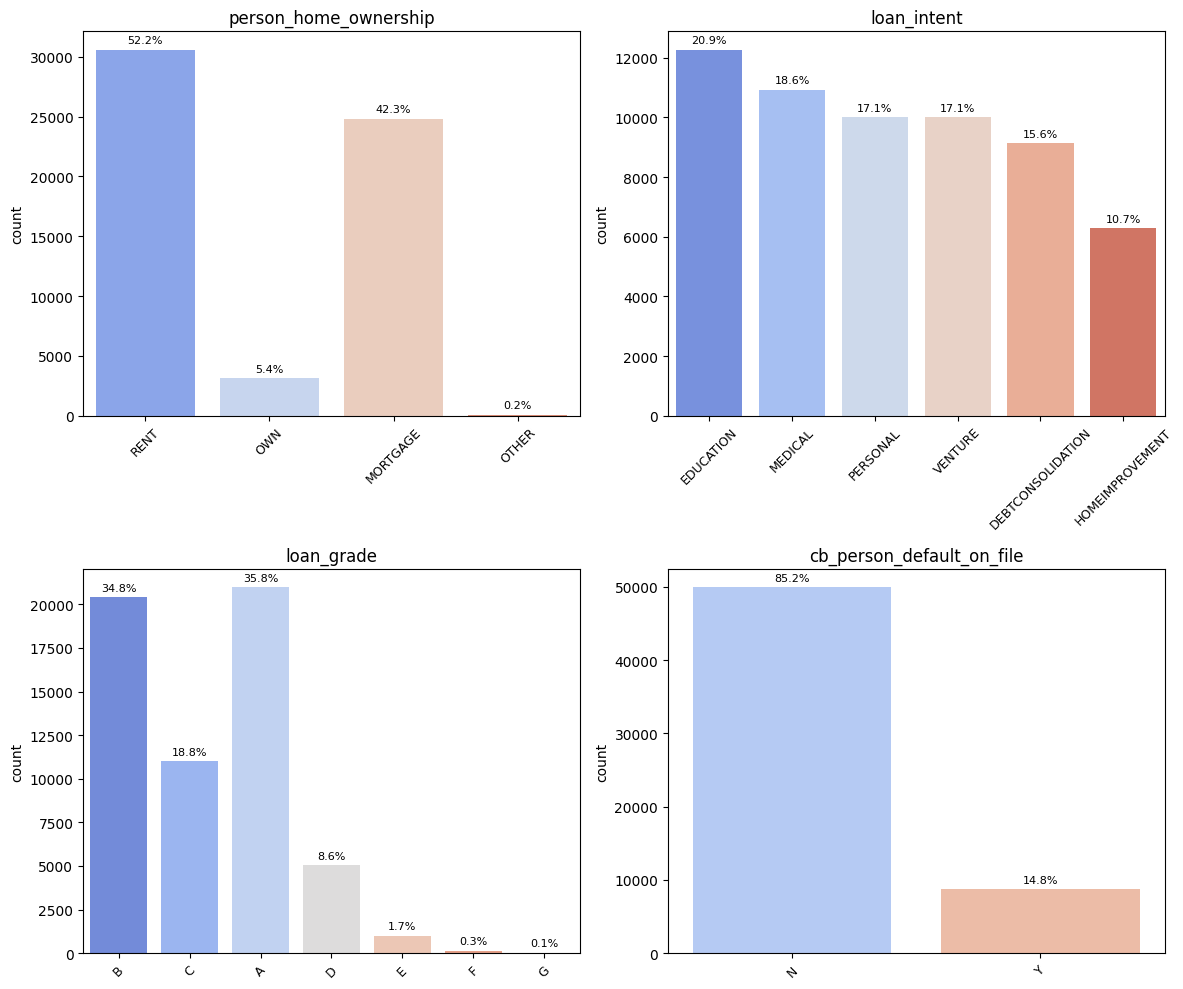

In [337]:
cat_feat = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cat_feat):
    ax = axes[i]
    sns.countplot(x=df_train[col], palette="coolwarm", ax=ax)

    ax.set_title(col)
    ax.set_xlabel('')
    ax.tick_params(axis="x", rotation=45, labelsize=9)

    total = df_train[col].notna().sum()
    if ax.containers:
        labels = [f'{b.get_height()/total:.1%}' for b in ax.containers[0]]
        ax.bar_label(ax.containers[0], labels=labels, padding=3, fontsize=8)

plt.tight_layout()
plt.show()

Как видно из графиков выше:
- в большинстве случаев люди либо арендуют жилье (52% случаев), либо покупают в ипотеку (42% случаев)
- цели для кредита распределены равномерно, при этом самой популярной целью является образование (20% случаев)
- большинство людей относятся к нормально кредитному рейтингу - суммарно A, B и C (89% случаев)
- у большинства заемщиков не было дефолтов (85% случаев)

### 3.3 Сравним клиентов выплативших и невыплативших кредит

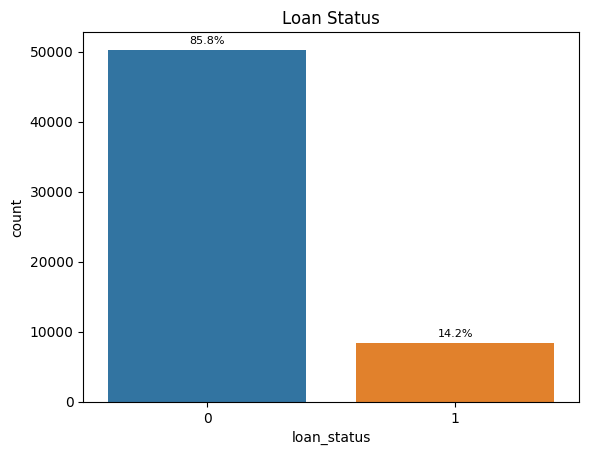

In [338]:
# Оценим соотношение классов в целевой переменной
ax = sns.countplot(x=df_train['loan_status'])
plt.title("Loan Status")

if ax.containers:
    labels = [f'{b.get_height()/total:.1%}' for b in ax.containers[0]]
    ax.bar_label(ax.containers[0], labels=labels, padding=3, fontsize=8)
    
plt.show()

Как видно из графика выше:
- 85.8 % клиентов выплатили кредит
- 14.2 % клиентов просрочили кредит
- Из-за этого в целевой переменной присутсвует дисбаланс классов

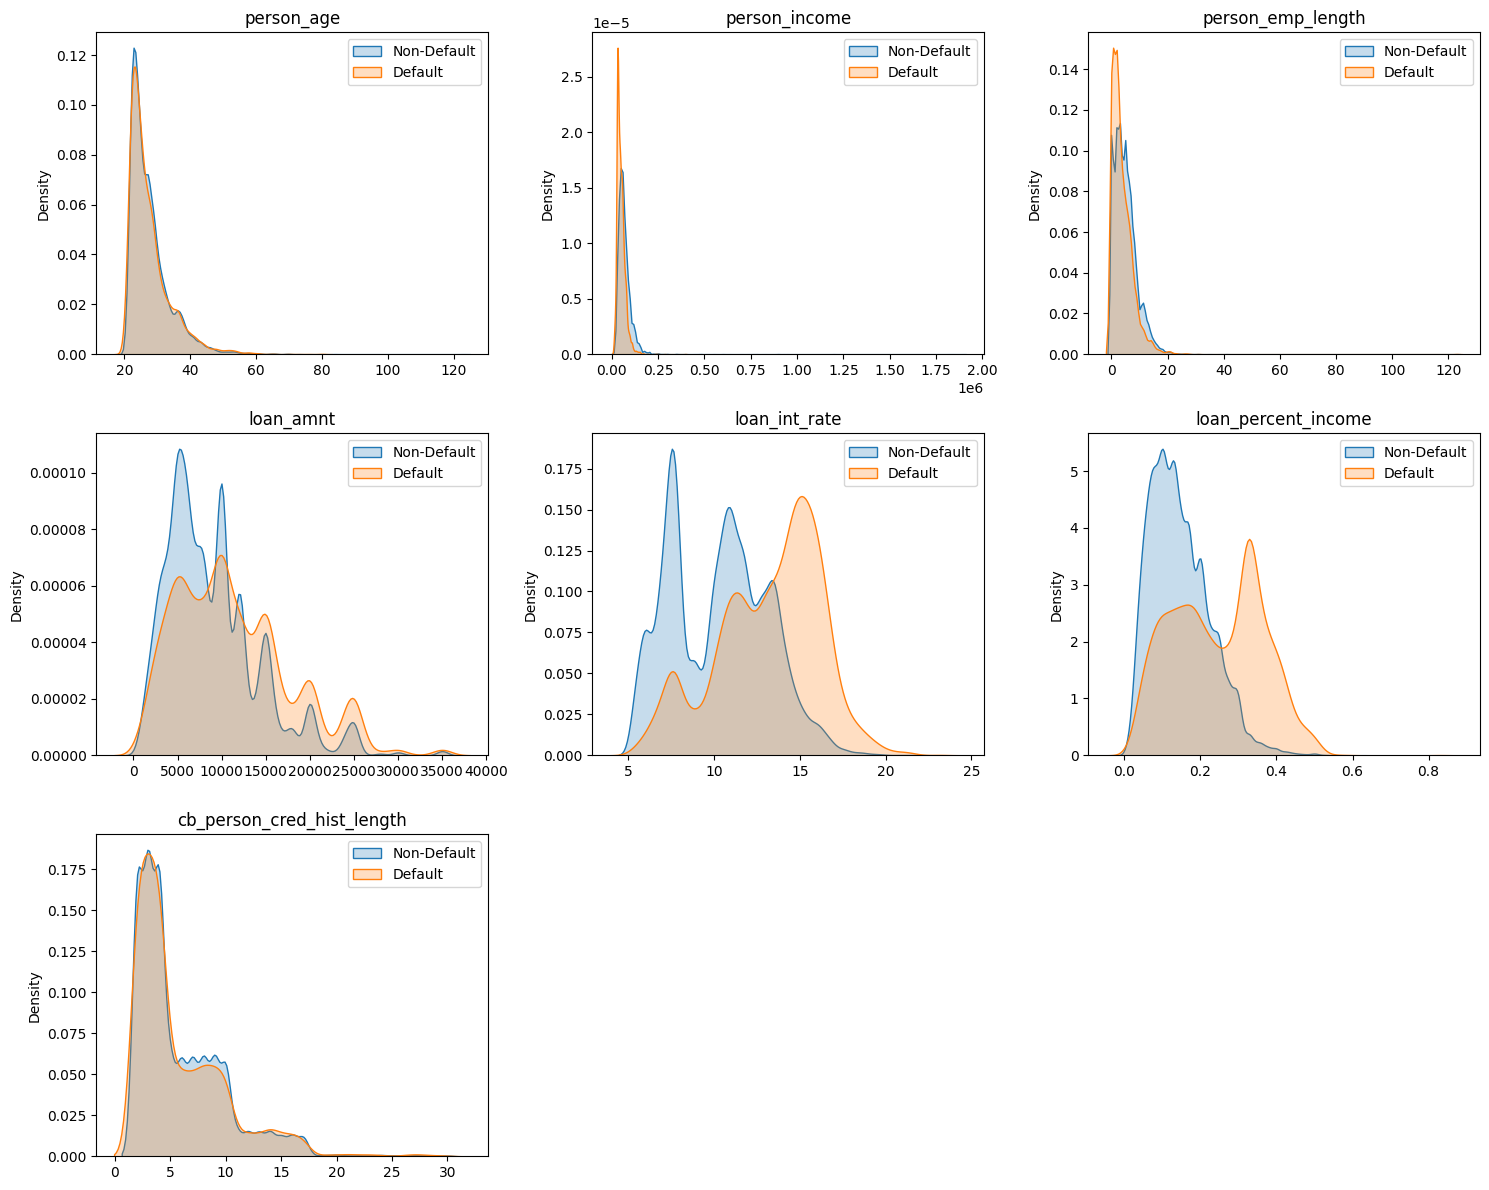

In [339]:
# Визуализируем график вероятностей для непрерывных переменных
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

ax = axes.flatten()

for i in range(0, len(num_feat), 1):
    sns.kdeplot(df_train[df_train['loan_status'] == 0][num_feat[i]], label='Non-Default', fill=True, ax=ax[i])
    sns.kdeplot(df_train[df_train['loan_status'] == 1][num_feat[i]], label='Default', fill=True, ax=ax[i])
    ax[i].set_title(f'{num_feat[i]}')
    ax[i].set_xlabel('')
    ax[i].legend()
    

fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
   
fig.tight_layout()
fig.show()

Как видно из графиков выше:
- распределения по возрасту, годовому доходу, стажу работу и длины кредитной истории совпадают для обеих категорий
- распределения по сумме кредита совпадают для обеих категорий, но между ними есть разница - кредиты без дефолта имеют более выскую плотность при меньших суммах кредита, а кредиты с дефолтом большую плотность при больших суммах кредита
- чем выше процентная ставка по кредиту, тем меньше вероятность, что кредит будет выплачен вовремя - особенно хорошо это видно на процентных ставках выше 15%
- если ежемесячная плата по кредиту составляет 30% от ежемесячного дохода и более - вероятность выплаты кредита резко снижается

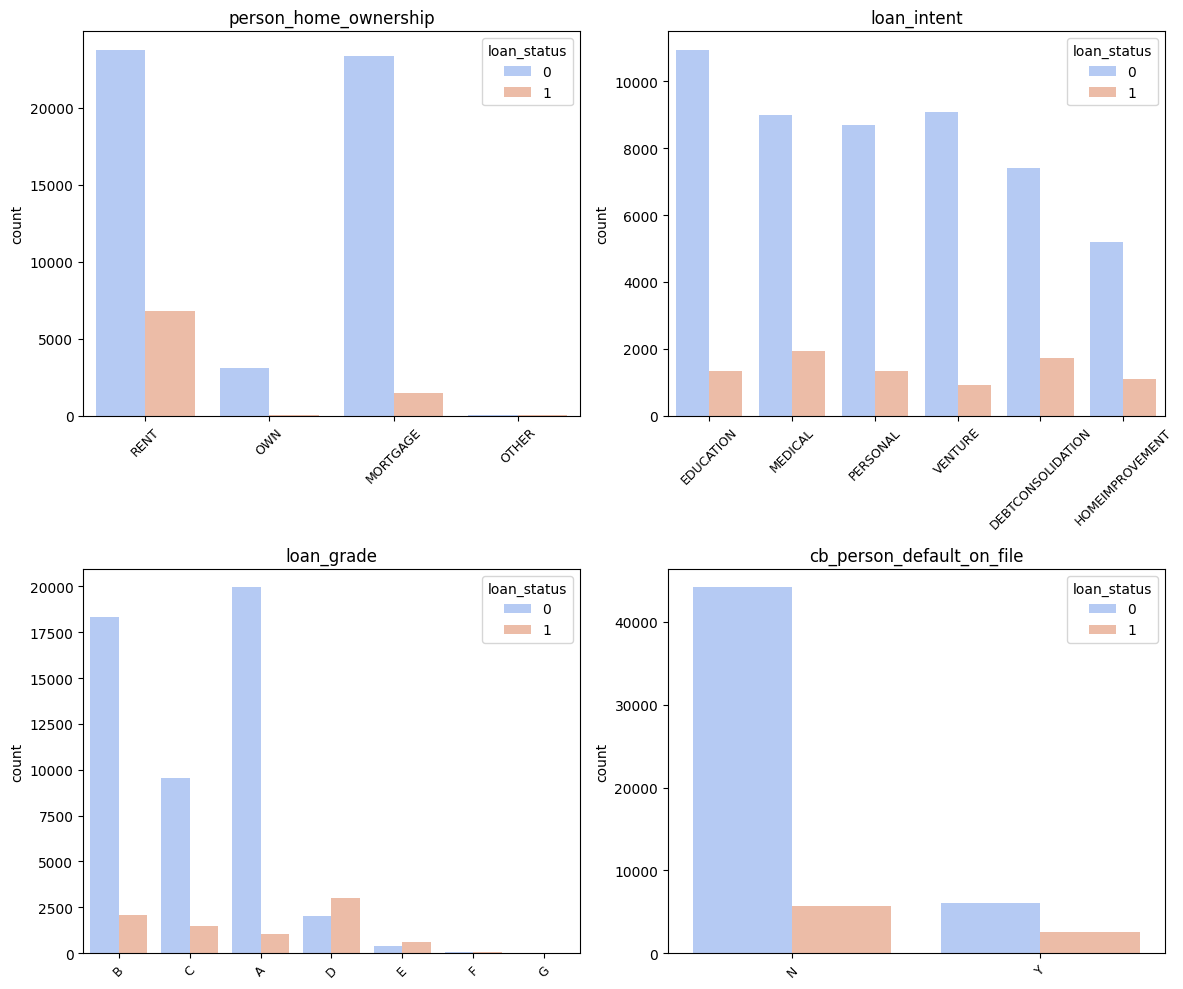

In [340]:
cat_feat = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cat_feat):
    ax = axes[i]
    sns.countplot(data=df_train, x=col, hue='loan_status', palette="coolwarm", ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.tick_params(axis="x", rotation=45, labelsize=9)


plt.tight_layout()
plt.show()

# 4. Корреляционный анализ данных

In [341]:
# Удалим ненужный столбец
df_train = df_train.drop(columns='id')
df_test = df_test.drop(columns='id')

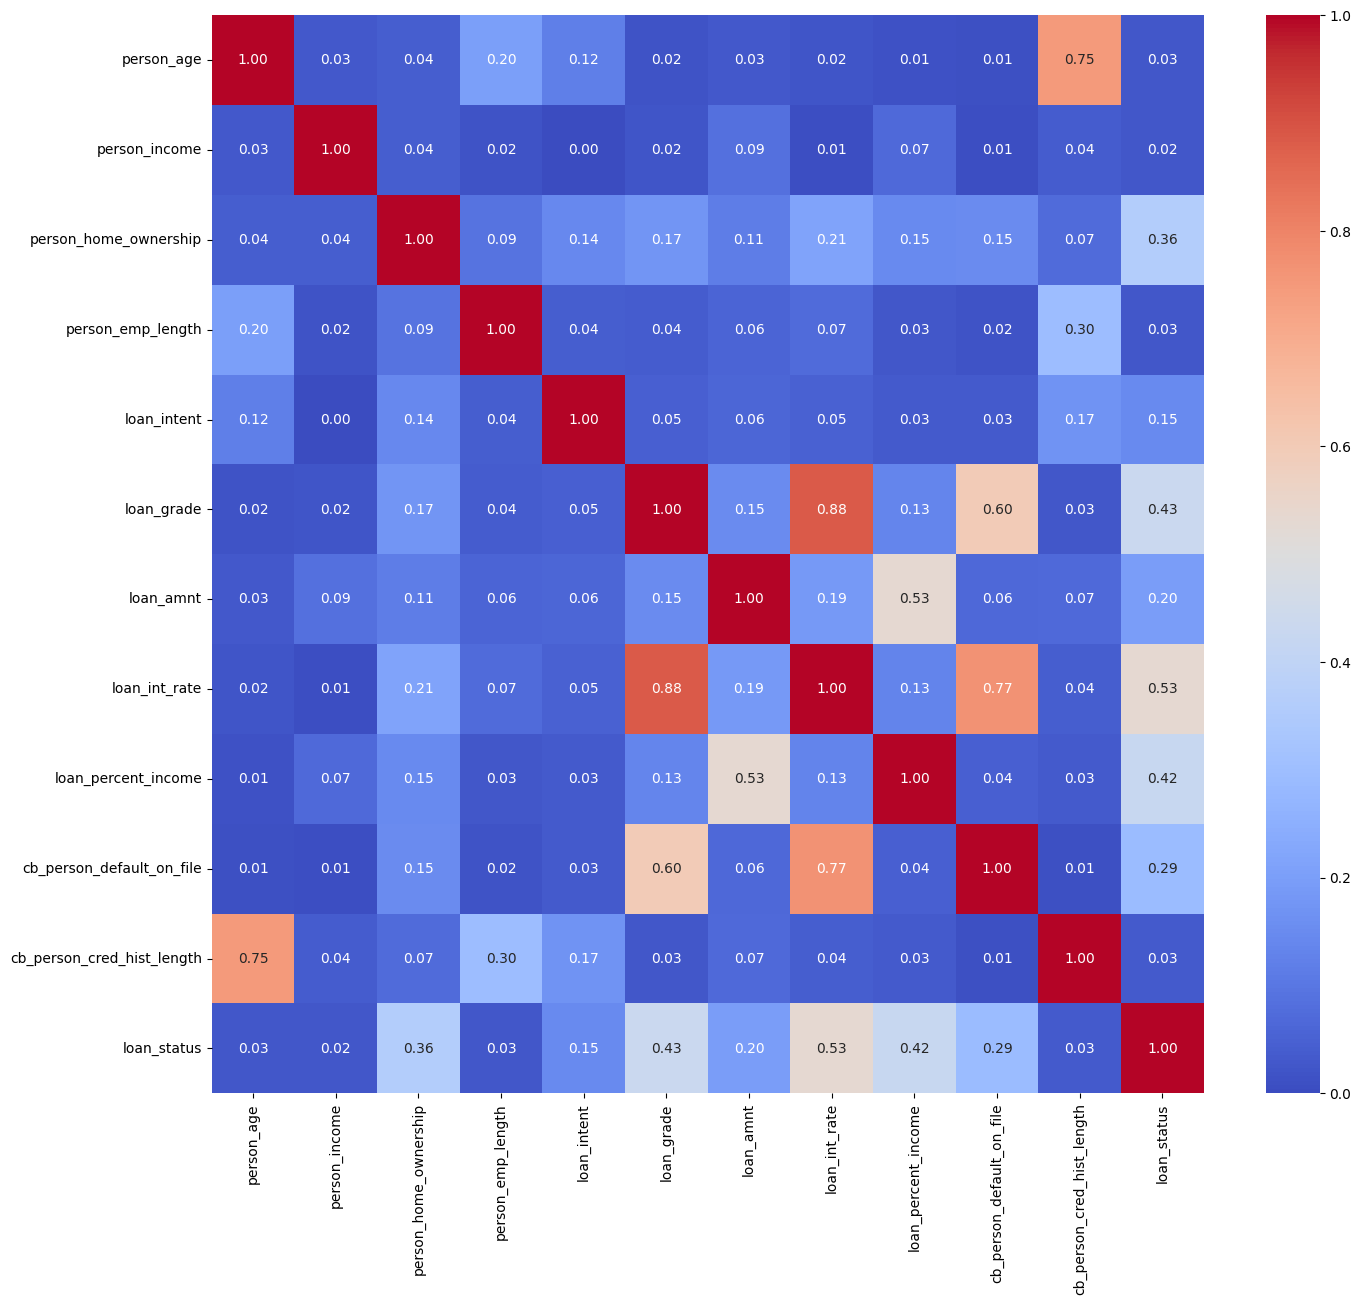

In [342]:
# Матрица корреляций для df_train
plt.figure(figsize=(16, 14))
sns.heatmap(df_train.phik_matrix(interval_cols = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"]), annot=True,  cmap='coolwarm', fmt='.2f');

Судя по тепловой карте и опираясь на шкалу Чеддока мы можем сказать, что:
- Есть умеренная связь с целевым признаком `loan_status` у входных признаков `loan_int_rate`, `loan_grade`, `loan_percent_income`, `person_home_ownership` 

# 5. Обучение моделей

### 5.1 Подготовим данные

In [343]:
# Закодируем бинарные категориальные переменные с помощью Label Encoder
label_encoder = LabelEncoder()
df_train.loc[:, 'cb_person_default_on_file'] = label_encoder.fit_transform(df_train['cb_person_default_on_file'])
df_test.loc[:, 'cb_person_default_on_file'] = label_encoder.transform(df_test['cb_person_default_on_file'])

df_train['cb_person_default_on_file'] = df_train['cb_person_default_on_file'].astype(int)
df_test['cb_person_default_on_file'] = df_test['cb_person_default_on_file'].astype(int)

In [344]:
# Закодируем остальные категориальные переменные с помощью One Hot Encoder
df_train = pd.get_dummies(df_train, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)

In [345]:
# Стандартизурем непрерывные переменые
scaler = StandardScaler()
df_train[num_feat] = scaler.fit_transform(df_train[num_feat])
df_test[num_feat] = scaler.transform(df_test[num_feat])

In [346]:
df_train.shape,df_test.shape

((58645, 23), (39098, 22))

In [347]:
# Разобьем датасет на признаки и целевую переменную
X = df_train.drop(columns=["loan_status"], axis=1)
y = df_train["loan_status"]

In [348]:
# Разобьем датасет на тренировачный и валидационный
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_val.shape}, y_test shape: {y_val.shape}")

X_train shape: (46916, 22), y_train shape: (46916,)
X_test shape: (11729, 22), y_test shape: (11729,)


### 5.2 Создадим модель

In [349]:
# Создадим модель
model = Sequential()

# Первый скрытый слой
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(BatchNormalization())            
model.add(keras.layers.ReLU())             
model.add(Dropout(0.3))                    

# Второй скрытый слой
model.add(Dense(32))
model.add(BatchNormalization())
model.add(keras.layers.ReLU())
model.add(Dropout(0.3))

# Выходной слой
model.add(Dense(1, activation='sigmoid')) 

# Компиляция модели
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),  
              metrics=['acc']) 

# Обучение
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=32,                  
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1467/1467 - 8s - 5ms/step - acc: 0.8854 - loss: 0.2898 - val_acc: 0.9295 - val_loss: 0.2100
Epoch 2/25
1467/1467 - 4s - 3ms/step - acc: 0.9118 - loss: 0.2444 - val_acc: 0.9376 - val_loss: 0.1968
Epoch 3/25
1467/1467 - 4s - 3ms/step - acc: 0.9191 - loss: 0.2323 - val_acc: 0.9393 - val_loss: 0.1913
Epoch 4/25
1467/1467 - 4s - 3ms/step - acc: 0.9216 - loss: 0.2257 - val_acc: 0.9411 - val_loss: 0.1895
Epoch 5/25
1467/1467 - 4s - 3ms/step - acc: 0.9246 - loss: 0.2226 - val_acc: 0.9442 - val_loss: 0.1871
Epoch 6/25
1467/1467 - 4s - 3ms/step - acc: 0.9248 - loss: 0.2198 - val_acc: 0.9448 - val_loss: 0.1838
Epoch 7/25
1467/1467 - 4s - 3ms/step - acc: 0.9271 - loss: 0.2176 - val_acc: 0.9433 - val_loss: 0.1840
Epoch 8/25
1467/1467 - 4s - 3ms/step - acc: 0.9291 - loss: 0.2154 - val_acc: 0.9458 - val_loss: 0.1832
Epoch 9/25
1467/1467 - 4s - 3ms/step - acc: 0.9283 - loss: 0.2151 - val_acc: 0.9409 - val_loss: 0.1862
Epoch 10/25
1467/1467 - 4s - 3ms/step - acc: 0.9286 - loss: 0.2155 - val_acc: 0.9432

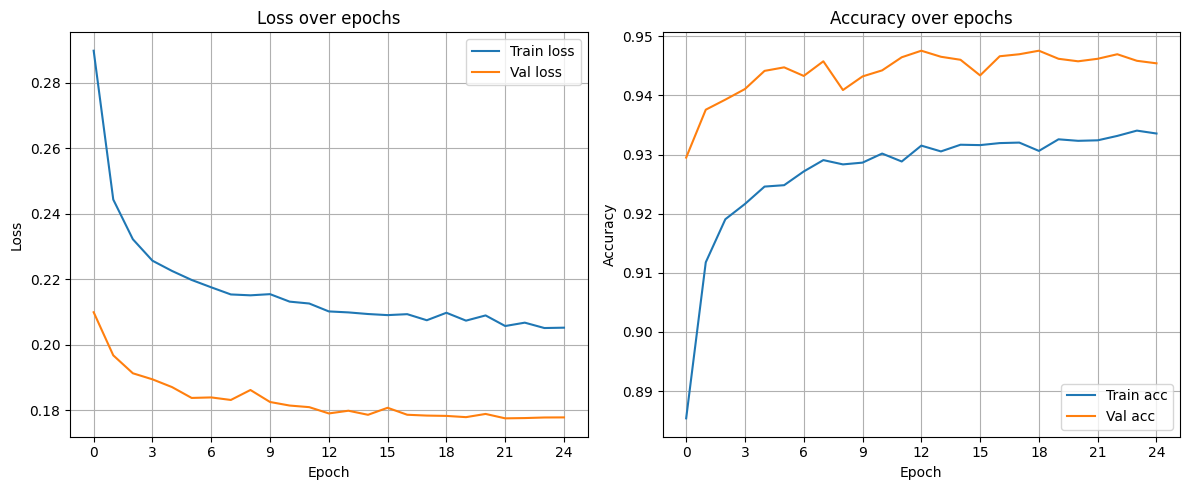

In [350]:
# Визуализируем графики accuracy и loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- График потерь (loss) ---
ax1.plot(history.history['loss'], label='Train loss')
ax1.plot(history.history['val_loss'], label='Val loss')
ax1.set_title('Loss over epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # Целые эпохи

# --- График точности (accuracy) ---
# Проверим, как называется метрика в history
if 'accuracy' in history.history:
    acc_key = 'accuracy'
    val_acc_key = 'val_accuracy'
else:
    acc_key = 'acc'
    val_acc_key = 'val_acc'

ax2.plot(history.history[acc_key], label='Train acc')
ax2.plot(history.history[val_acc_key], label='Val acc')
ax2.set_title('Accuracy over epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))  # Целые эпохи

# Показываем оба графика
plt.tight_layout()
plt.show()

### 5.3 Оценим ROC-AUC, PR-AUC и F1-Score

In [351]:
# Получим вероятнсоти меток
y_pred_probs = model.predict(X_val)

367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


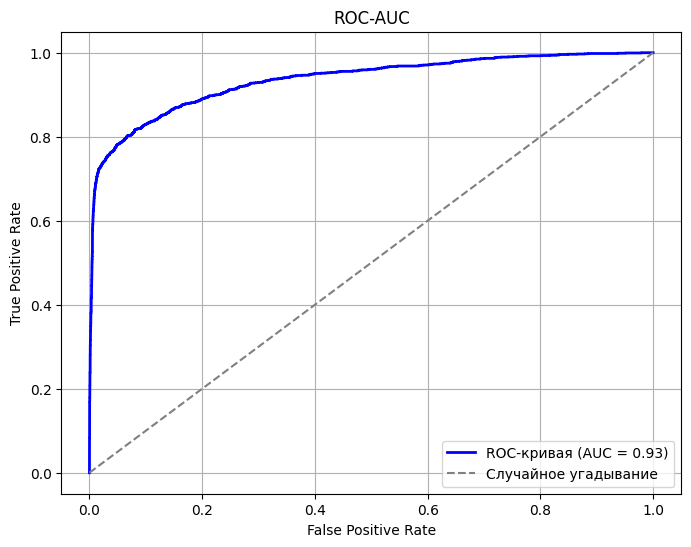

In [352]:
# Построим ROC-AUC

# Вычисляем ROC-кривую и AUC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Случайное угадывание')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

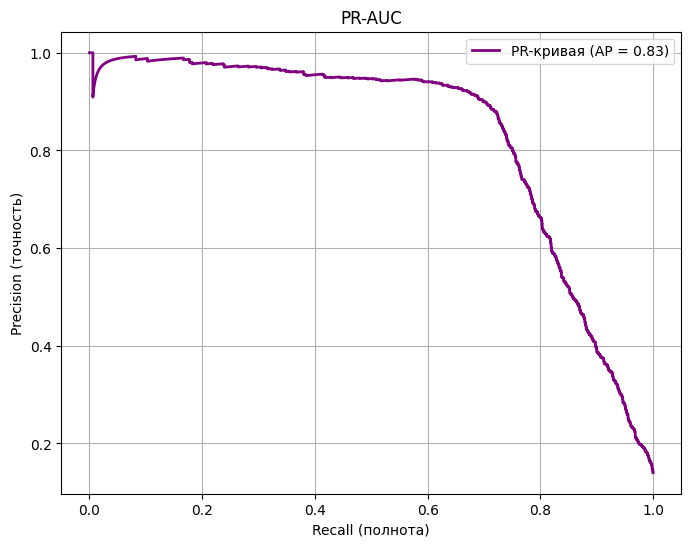

In [353]:
# Построим PR-AUC

# Вычисляем значения precision, recall и пороги
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_probs)

# AUC-PR (интегральная метрика)
average_precision = average_precision_score(y_val, y_pred_probs)

# Построение PR-кривой
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label=f'PR-кривая (AP = {average_precision:.2f})')

plt.xlabel('Recall (полнота)')
plt.ylabel('Precision (точность)')
plt.title('PR-AUC')
plt.legend(loc='upper right')
plt.grid()
plt.show()

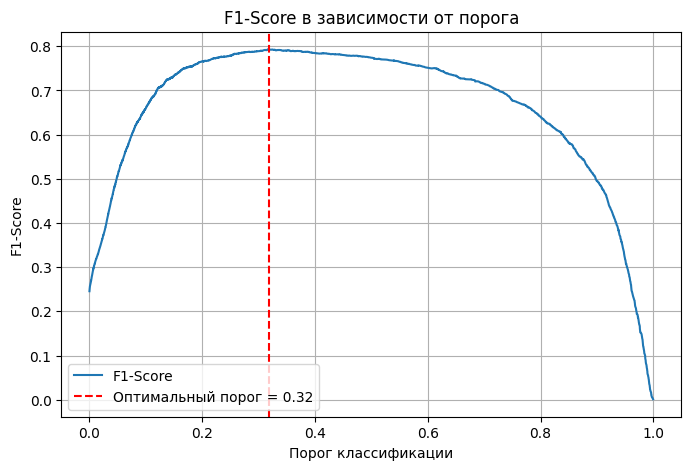

In [354]:
# Построим F1-Score

precision, recall, thresholds = precision_recall_curve(y_val, y_pred_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
optimal_idx = f1_scores.argmax()
optimal_threshold_pr = thresholds[optimal_idx]

plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores[:-1], label='F1-Score')
plt.axvline(optimal_threshold_pr, color='red', linestyle='--', label=f'Оптимальный порог = {optimal_threshold_pr:.2f}')
plt.xlabel('Порог классификации')
plt.ylabel('F1-Score')
plt.title('F1-Score в зависимости от порога')
plt.legend()
plt.grid()
plt.show()

### 5.4 Сделаем предсказание для тестовой выборки

In [355]:
# Получим вероятности меток для валидационной и тестовой выборки
predictions = model.predict(X_val)
test_predictions = model.predict(df_test)


367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [356]:
# Конвертируем вероятности в метки, с учетом оптимального порога
predictions_labels = (predictions > optimal_threshold_pr).astype(int)
test_labels = (test_predictions > optimal_threshold_pr).astype(int)

In [357]:
# Оценим метрики для обоих классов
accuracy = accuracy_score(y_val, predictions_labels)
roc_auc = roc_auc_score(y_val, predictions)
f1 = f1_score(y_val, predictions_labels)
print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print(f"F1 Score: {f1}")
print(classification_report(y_val, predictions_labels))

Accuracy: 0.9471395685906727
ROC AUC Score: 0.9348999272709885
F1 Score: 0.7927807486631016
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     10087
           1       0.88      0.72      0.79      1642

    accuracy                           0.95     11729
   macro avg       0.92      0.85      0.88     11729
weighted avg       0.95      0.95      0.94     11729



In [358]:
ids = df_test.index.to_numpy()

# Приводим labels к 1D массиву
test_labels = test_labels.flatten()

submission = pd.DataFrame({'id': ids, 'loan_status': test_labels})
submission.to_csv('submission.csv', index=False)

print("Submission file saved!")

Submission file saved!


In [359]:
print(submission)

          id  loan_status
0          0            1
1          1            0
2          2            1
3          3            0
4          4            0
...      ...          ...
39093  39093            0
39094  39094            0
39095  39095            0
39096  39096            0
39097  39097            1

[39098 rows x 2 columns]


In [360]:
# Загруим датасет для проверки ID
df_test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
print(df_test[['id']].head())

      id
0  58645
1  58646
2  58647
3  58648
4  58649


In [361]:
# Если ensemble_test_predictions — вероятности 2 классов, берем второй столбец
if test_predictions.ndim == 2 and test_predictions.shape[1] == 2:
    test_predictions = test_predictions[:, 1]

# Если 2D с одной колонкой — сжимаем до 1D
elif test_predictions.ndim == 2 and test_predictions.shape[1] == 1:
    test_predictions = test_predictions.flatten()

submission = pd.DataFrame({'id': df_test['id'], 'loan_status': test_predictions})
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [362]:
# Финальный результат
submission.head

<bound method NDFrame.head of           id  loan_status
0      58645     0.950644
1      58646     0.023099
2      58647     0.500088
3      58648     0.031038
4      58649     0.114305
...      ...          ...
39093  97738     0.039211
39094  97739     0.005537
39095  97740     0.025600
39096  97741     0.145507
39097  97742     0.971472

[39098 rows x 2 columns]>

# 6. Общий вывод

**В процессе исследования, мы:**
- **Выгрузили исходные данные в 2 датафрейма**
- **Предобработали данные - выставили корректные типы данных, проверили данные на наличие пропусков**
- **Провели исследовательский анализ данных**
- **Обучили нейросетевую модель**
- **Выбрали лучший порог для классификации, с точки зрения метрики F1-Score**

**Итоговые значения метрик:**
- **Accuracy: 0.945**
- **ROC AUC Score: 0.933**
- **F1 Score: 0.784**